In [1]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib

In [3]:
CVD = pd.read_csv('/content/full_data.csv')
print(CVD.head())
print(CVD.dtypes)


         date     location  new_cases  new_deaths  total_cases  total_deaths  \
0  2020-02-24  Afghanistan        5.0         NaN          5.0           NaN   
1  2020-02-25  Afghanistan        0.0         NaN          5.0           NaN   
2  2020-02-26  Afghanistan        0.0         NaN          5.0           NaN   
3  2020-02-27  Afghanistan        0.0         NaN          5.0           NaN   
4  2020-02-28  Afghanistan        0.0         NaN          5.0           NaN   

   weekly_cases  weekly_deaths  biweekly_cases  biweekly_deaths  
0           NaN            NaN             NaN              NaN  
1           NaN            NaN             NaN              NaN  
2           NaN            NaN             NaN              NaN  
3           NaN            NaN             NaN              NaN  
4           NaN            NaN             NaN              NaN  
date                object
location            object
new_cases          float64
new_deaths         float64
total_cases    

In [4]:
CVD['date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in CVD['date']]

In [8]:
print(CVD.dtypes)

date               datetime64[ns]
location                   object
new_cases                 float64
new_deaths                float64
total_cases               float64
total_deaths              float64
weekly_cases              float64
weekly_deaths             float64
biweekly_cases            float64
biweekly_deaths           float64
dtype: object


In [5]:
countries=['United States', 'Spain', 'Italy']
CVD_country = CVD[CVD.location.isin(countries)]

In [6]:
CVD_country.set_index('date', inplace=True)

In [9]:
CVD_country = CVD_country.loc['2020-02-15':'2020-03-22']

In [10]:
CVD_country['mortality_rate'] = CVD_country['total_deaths']/CVD_country['total_cases']

In [11]:
print(CVD_country.tail())

                 location  new_cases  new_deaths  total_cases  total_deaths  \
date                                                                          
2020-03-18  United States     2657.0        60.0       9169.0         194.0   
2020-03-19  United States     4494.0        72.0      13663.0         266.0   
2020-03-20  United States     6367.0       106.0      20030.0         372.0   
2020-03-21  United States     5995.0       103.0      26025.0         475.0   
2020-03-22  United States     8919.0       128.0      34944.0         603.0   

            weekly_cases  weekly_deaths  biweekly_cases  biweekly_deaths  \
date                                                                       
2020-03-18        8022.0          161.0          9062.0            183.0   
2020-03-19       12077.0          223.0         13479.0            254.0   
2020-03-20       17811.0          321.0         19793.0            358.0   
2020-03-21       23047.0          417.0         25622.0           

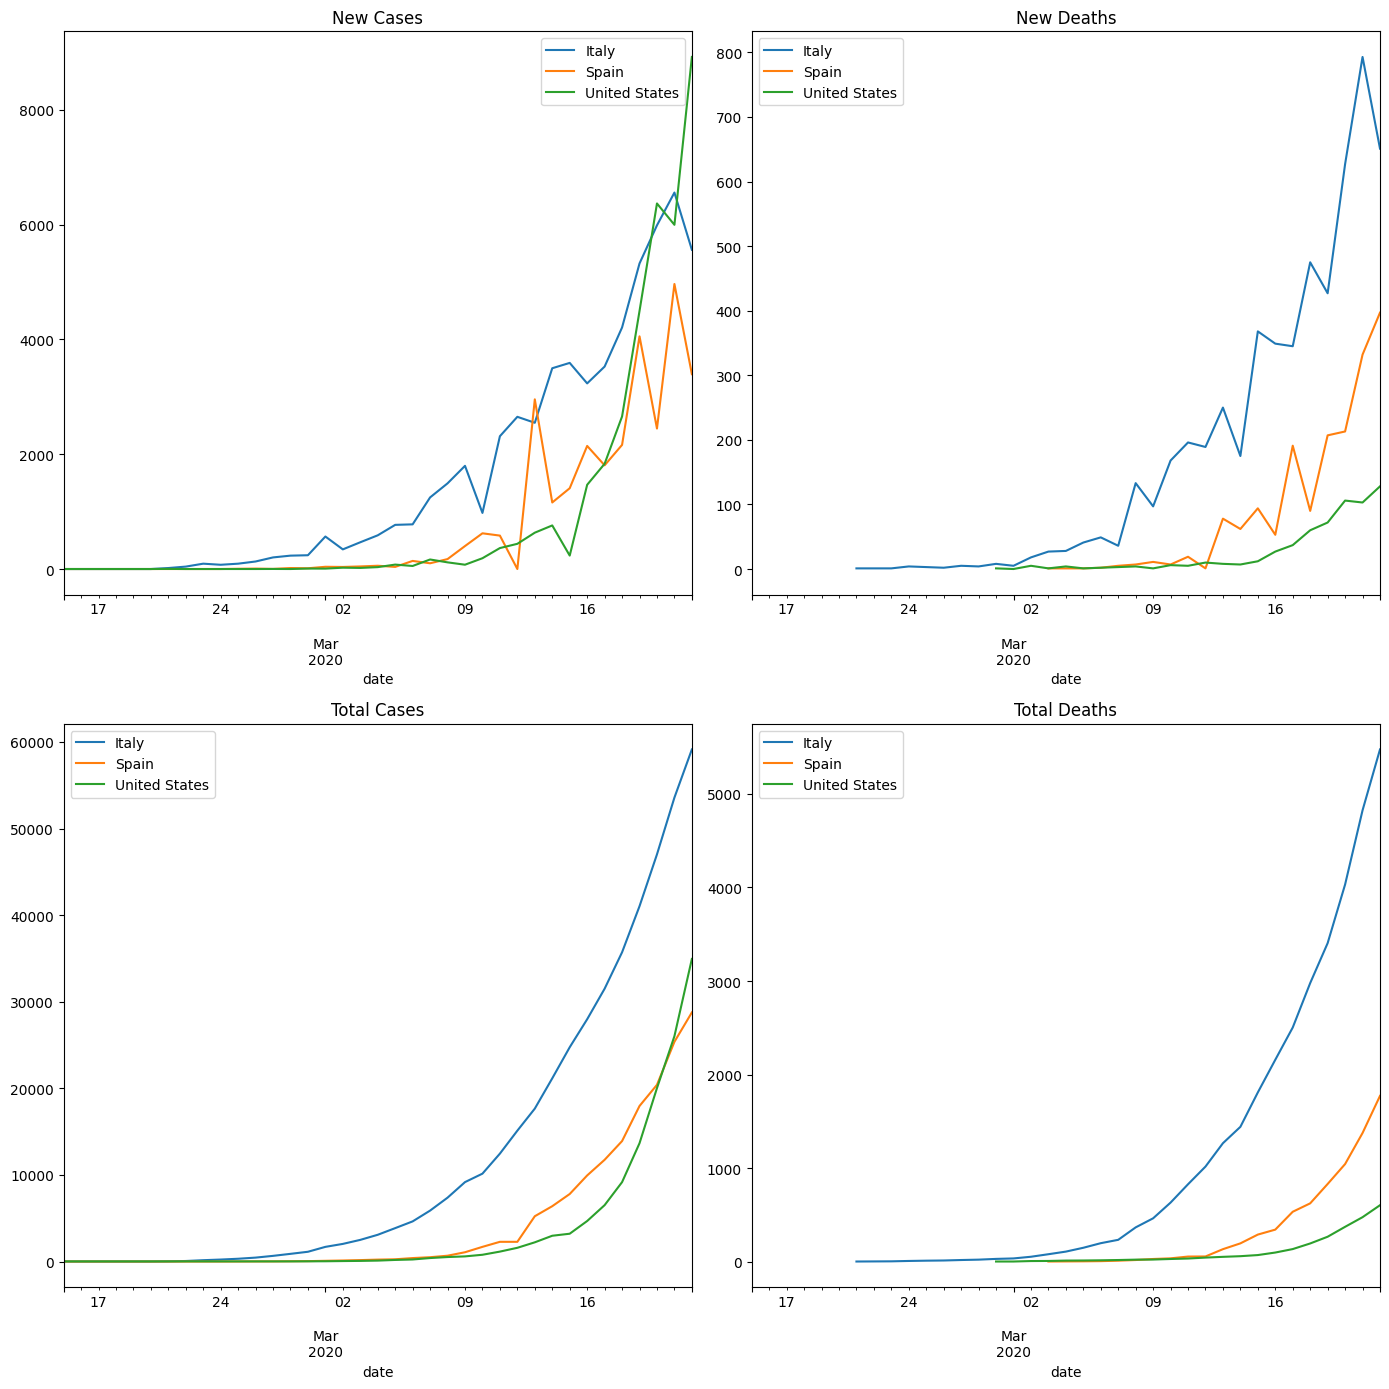

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

CVD_country.groupby('location')['new_cases'].plot(ax=axes[0,0], legend=True) #for log scale add logy=True
CVD_country.groupby('location')['new_deaths'].plot(ax=axes[0,1], legend=True)
CVD_country.groupby('location')['total_cases'].plot(ax=axes[1,0], legend=True)
CVD_country.groupby('location')['total_deaths'].plot(ax=axes[1,1], legend=True)
#CVD_country.groupby('location')['mortality_rate'].plot(ax=axes[1,1], legend=True)
#CVD_country.to_csv('data/output.csv')

axes[0, 0].set_title("New Cases")
axes[0, 1].set_title("New Deaths")
axes[1, 0].set_title("Total Cases")
axes[1, 1].set_title("Total Deaths")

fig.tight_layout()